# <font size='10' color='#1ABC9C'> Model Creation </font>

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
## When using the 'inline' backend, 
## your matplotlib graphs will be included in your notebook, next to the code.
import seaborn as sns
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
pd.pandas.set_option('display.max_columns',None)

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [32]:
dataset=pd.read_csv('X_train.csv')

##What's the shape of data set
print(dataset.shape)

(3155, 17)


In [33]:
dataset.head()

,income,age,yrsed,yrsempl,creddebt,othdebt,address,cars,carvalue,edcat,default,jobsat,homeown,edcat2,edcat3,edcat4,edcat5
0,2.772589,1.000000,0.411765,0.653846,0.475553,0.424034,0.771930,0.166667,0.354501,2,0,4,0,1,0,0,0
1,3.583519,0.114754,0.705882,0.000000,0.717623,0.532861,0.070175,0.000000,0.620105,4,1,2,1,0,0,1,0
2,4.127134,0.262295,0.764706,0.057692,0.632413,0.617074,0.140351,0.000000,0.594209,4,1,2,1,0,0,1,0
3,3.044522,0.770492,0.647059,0.442308,0.566571,0.457758,0.210526,0.166667,0.391828,4,0,4,0,0,0,1,0
4,2.564949,0.180328,0.647059,0.057692,0.436658,0.384711,0.105263,0.000000,0.220521,4,0,3,1,0,0,1,0


In [4]:
## capturing the dependent feature
y_train = dataset['income']

In [5]:
##Droping Dependent variable from the dataset
x_train=dataset.drop(['income'],axis=1)

## Droping unselected features
x_train=x_train.drop(['age','yrsed','default','address','cars'],axis=1)

x_train.head()

,edcat,yrsempl,creddebt,othdebt,jobsat,homeown,carvalue
0,0.25,0.653846,0.475553,0.424034,0.75,0.0,0.354501
1,0.75,0.000000,0.717623,0.532861,0.25,1.0,0.620105
2,0.75,0.057692,0.632413,0.617074,0.25,1.0,0.594209
3,0.75,0.442308,0.566571,0.457758,0.75,0.0,0.391828
4,0.75,0.057692,0.436658,0.384711,0.50,1.0,0.220521


### List of Selected Features :- 
    1. edcat
    2. yrsempl
    3. creddebt
    4. othdebt
    5. jobsat
    6. homeown
    7. carvalue

In [6]:
test_dataSet =pd.read_csv('X_test.csv')

test_dataSet.head()



,income,age,yrsed,edcat,yrsempl,creddebt,othdebt,default,jobsat,homeown,address,cars,carvalue
0,4.477337,0.459016,0.529412,0.50,0.211538,0.532582,0.537874,0.0,0.75,1.0,0.315789,0.166667,0.797952
1,3.688879,0.573770,0.117647,0.00,0.269231,0.417300,0.288202,0.0,0.25,1.0,0.315789,0.166667,0.512073
2,3.891820,0.245902,0.529412,0.50,0.115385,0.593294,0.544614,0.0,0.25,1.0,0.192982,0.000000,0.644696
3,2.890372,0.032787,0.352941,0.25,0.019231,0.596469,0.381121,1.0,0.00,0.0,0.000000,0.166667,0.321673
4,3.951244,0.803279,0.705882,0.75,0.096154,0.573228,0.618974,1.0,0.00,0.0,0.456140,0.166667,0.616721


In [7]:
y_test = test_dataSet['income']
x_test  = test_dataSet.drop(['age','yrsed','default','address','cars','income'],axis=1)

### Model 1

In [8]:
model1 = LR.fit(x_train,y_train)

In [9]:
y_prediction = LR.predict(x_test)
y_prediction

array([4.46846201, 3.36227727, 3.96166905, ..., 3.80695785, 3.77993707,
       2.57700091])

In [23]:
y_test.tail(3)

1350    3.806662
1351    3.555348
1352    2.397895
Name: income, dtype: float64

In [11]:
# predicting the accuracy score
score=r2_score(y_test,y_prediction)
print("r2 socre is ",score)
print("mean_sqrd_error is==",mean_squared_error(y_test,y_prediction))
print("root_mean_squared error of is==",np.sqrt(mean_squared_error(y_test,y_prediction)))

r2 socre is  0.9168691120127638
mean_sqrd_error is== 0.045119323507713346
root_mean_squared error of is== 0.2124130963658158


In [12]:
LR.coef_

array([7.98388170e-02, 1.60426784e-01, 2.20937719e-01, 4.18964359e-01,
       3.28305201e-03, 1.78086309e-02, 3.30141362e+00])

In [13]:
LR.intercept_

1.3969478521946965

In [14]:
print(format(LR.coef_[1],'.20f'))

0.16042678419708544801


In [15]:
x_test_OutData_dataset= pd.read_csv('X_test_OutOfDatasetValues.csv') 

In [16]:
y_test_OutData = x_test_OutData_dataset['income']
x_test_OutData = x_test_OutData_dataset.drop(['age','yrsed','default','address','cars','income'],axis=1)


In [17]:
y_Outdata_predict = LR.predict(x_test_OutData)
y_Outdata_predict

array([32.81672272,  3.36227728,  3.96166904, ...,  3.80695785,
        3.77993707,  2.57700091])

In [18]:
# USed Statmodel to get better view of summary of the Model created 
import statsmodels.api as sm
results = sm.OLS(y_train,x_train).fit()
results.summary() 



#LR.fit(x_train,y_train).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 income   R-squared (uncentered):                   0.991
Model:                            OLS   Adj. R-squared (uncentered):              0.991
Method:                 Least Squares   F-statistic:                          4.980e+04
Date:                Mon, 28 Feb 2022   Prob (F-statistic):                        0.00
Time:                        13:47:16   Log-Likelihood:                         -1228.9
No. Observations:                3155   AIC:                                      2472.
Df Residuals:                    3148   BIC:                                      2514.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
edcat          0.2401      0.022     10.966      0.000       0.197       0.283
yrsempl        0.1618      0.041      3.969      0.000       0.082       0.242
creddebt       1.5967      0.061     26.010      0.000       1.476       1.717
othdebt        1.2884      0.071     18.040      0.000       1.148       1.428
jobsat         0.1317      0.021      6.240      0.000       0.090       0.173
homeown        0.1235      0.013      9.387      0.000       0.098       0.149
carvalue       3.1594      0.044     72.593      0.000       3.074       3.245
==============================================================================
Omnibus:                      102.123   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              113.781
Skew:                           0.427   Prob(JB):                     1.96e-25
Kurtosis:                       3.370   Cond. No.                         19.0
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
y_Outdata_predict = results.predict(x_test_OutData)
y_Outdata_predict

0       32.549079
1        2.855459
2        3.981025
3        2.522871
4        3.856906
          ...    
1348     3.400180
1349     2.382019
1350     3.677447
1351     3.720159
1352     2.458985
Length: 1353, dtype: float64

# <font size='10' color='#1ABC9C'>Assumptions For Multiple Regression Model</font>

## Multivollinearity Test

Null Hypothesis :-  Independent Variables are interdependent on each other 
    

In [20]:
x_train_corr=x_train.corr()
print (x_train_corr)

             edcat   yrsempl  creddebt   othdebt    jobsat   homeown  carvalue
edcat     1.000000 -0.218731  0.122680  0.153331 -0.072730  0.049412  0.188915
yrsempl  -0.218731  1.000000  0.182956  0.204565  0.467865  0.030800  0.267951
creddebt  0.122680  0.182956  1.000000  0.683877  0.165283  0.084391  0.549546
othdebt   0.153331  0.204565  0.683877  1.000000  0.177117  0.105549  0.631718
jobsat   -0.072730  0.467865  0.165283  0.177117  1.000000  0.048100  0.253416
homeown   0.049412  0.030800  0.084391  0.105549  0.048100  1.000000  0.168077
carvalue  0.188915  0.267951  0.549546  0.631718  0.253416  0.168077  1.000000


## Gauss-Markov Theorem and Assumption
According to the Gauss–Markov theorem, in a linear regression model the ordinary least squares (OLS) estimator gives the best linear unbiased estimator (BLUE) of the coefficients, provided that:
the expectation of errors (residuals) is 0
the errors are uncorrelated
the errors have equal variance — homoscedasticity of errors
Also, ‘best’ in BLUE means resulting in the lowest variance of the estimate, in comparison to other unbiased, linear estimators.
For the estimator to be BLUE, the residuals do not need to follow normal (Gaussian) distribution, nor do they need to be independent and identically distributed.


###### Reference :- https://corporatefinanceinstitute.com/resources/knowledge/other/multiple-linear-regression/

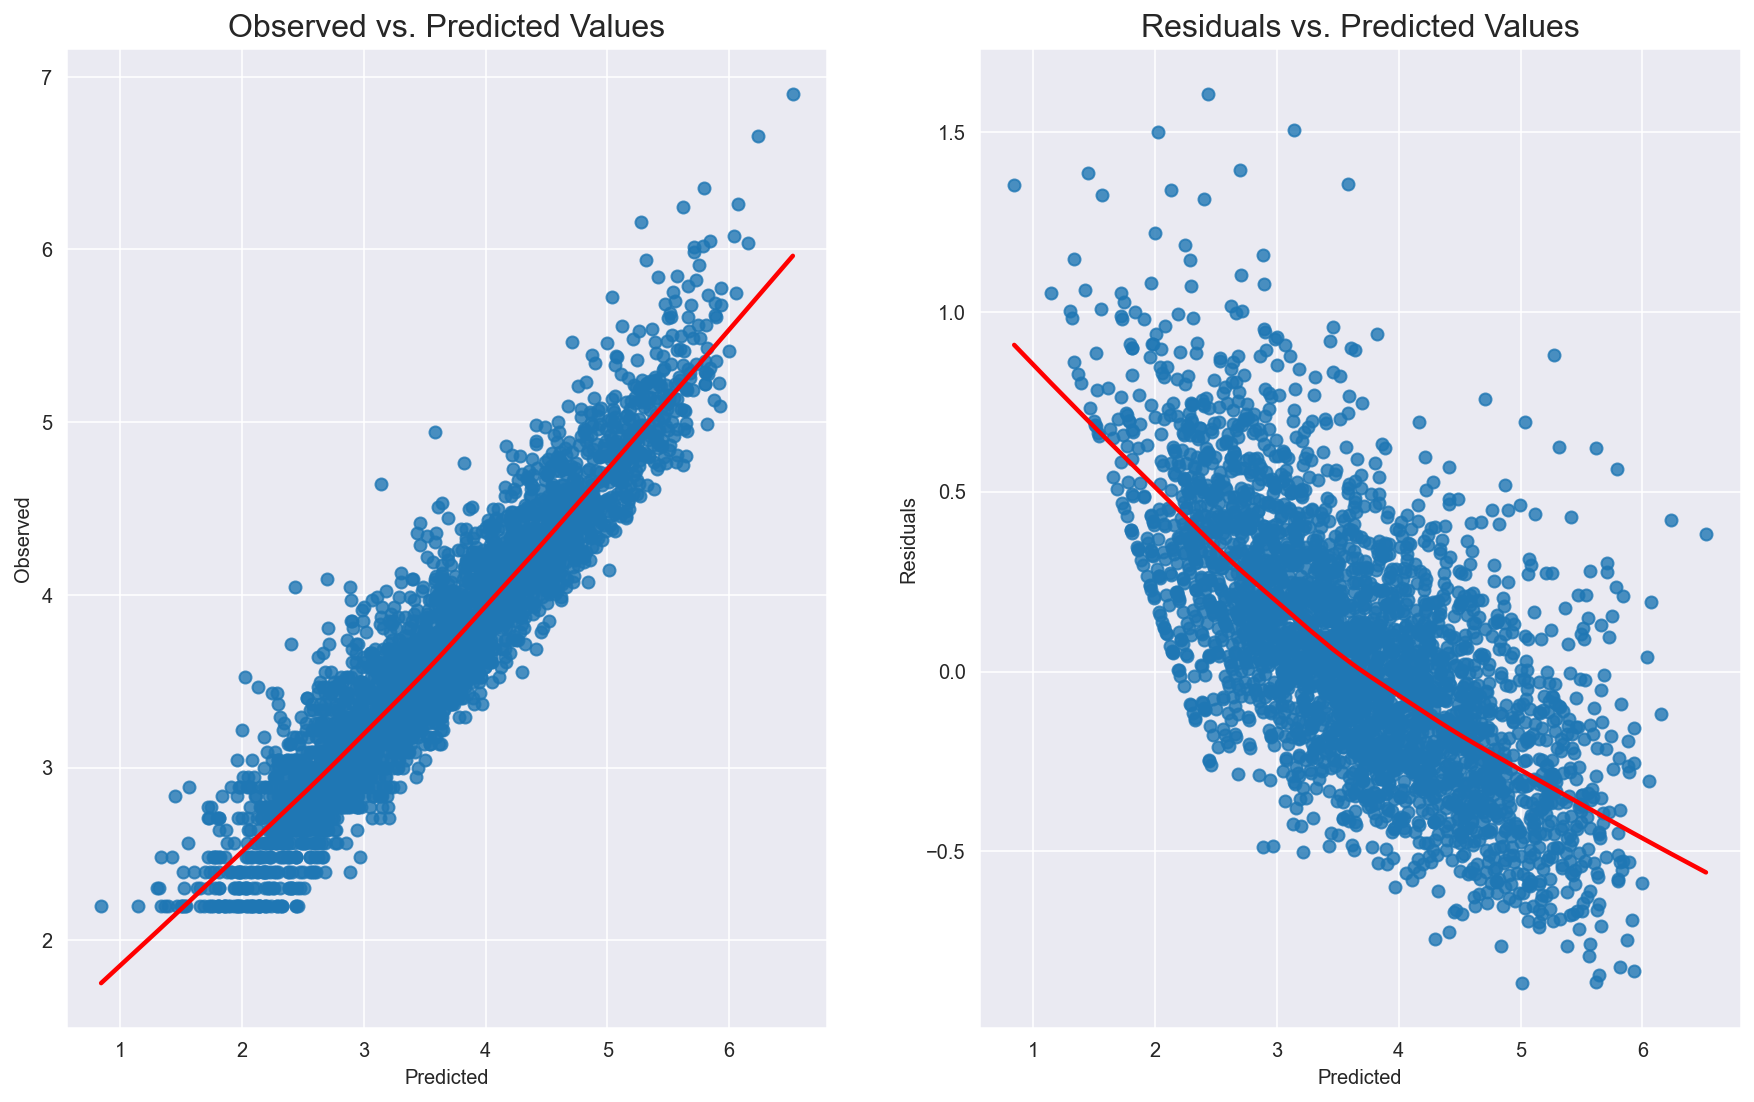

In [21]:
%config InlineBackend.figure_format ='retina'
sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)

def linearity_test(model, y):
    '''
    Function for visually inspecting the assumption of linearity in a linear regression model.
    It plots observed vs. predicted values and residuals vs. predicted values.
    
    Args:
    * model - fitted OLS model from statsmodels
    * y - observed values
    '''
    fitted_vals = model.predict()
    resids = model.resid

    fig, ax = plt.subplots(1,2)
    
    sns.regplot(x=fitted_vals, y=y, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Observed vs. Predicted Values', fontsize=16)
    ax[0].set(xlabel='Predicted', ylabel='Observed')

    sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Residuals vs. Predicted Values', fontsize=16)
    ax[1].set(xlabel='Predicted', ylabel='Residuals')
    
linearity_test(results, y_train)    

In [22]:
results.resid.mean()

0.060130861238101393

In [28]:
Orig_dataset=pd.read_csv('IncomeData.csv')

Y_Test_dataset = Orig_dataset['income']
X_Orig_dataset = Orig_dataset.drop(['age','yrsed','default','address','cars','income'],axis=1)

results = sm.OLS(y_train,x_train).fit()
results.summary() 



<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 income   R-squared (uncentered):                   0.991
Model:                            OLS   Adj. R-squared (uncentered):              0.991
Method:                 Least Squares   F-statistic:                          4.980e+04
Date:                Mon, 28 Feb 2022   Prob (F-statistic):                        0.00
Time:                        14:01:34   Log-Likelihood:                         -1228.9
No. Observations:                3155   AIC:                                      2472.
Df Residuals:                    3148   BIC:                                      2514.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
edcat          0.2401      0.022     10.966      0.000       0.197       0.283
yrsempl        0.1618      0.041      3.969      0.000       0.082       0.242
creddebt       1.5967      0.061     26.010      0.000       1.476       1.717
othdebt        1.2884      0.071     18.040      0.000       1.148       1.428
jobsat         0.1317      0.021      6.240      0.000       0.090       0.173
homeown        0.1235      0.013      9.387      0.000       0.098       0.149
carvalue       3.1594      0.044     72.593      0.000       3.074       3.245
==============================================================================
Omnibus:                      102.123   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              113.781
Skew:                           0.427   Prob(JB):                     1.96e-25
Kurtosis:                       3.370   Cond. No.                         19.0
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
prediction = results.predict(X_Orig_dataset)
prediction

0        32.549079
1        22.931569
2        21.693293
3        26.232883
4        72.510959
           ...    
4503    269.229403
4504     39.495015
4505     67.320103
4506    126.272144
4507     85.595140
Length: 4508, dtype: float64

In [30]:
Y_Test_dataset

0        17
1        12
2         9
3        16
4        37
       ... 
4503    182
4504     29
4505     46
4506     80
4507     55
Name: income, Length: 4508, dtype: int64